In [1]:
import fastf1 as ff1
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

In [3]:
session = ff1.get_session(2025,16,'R')
weekend = session.event
session.load()
lap = session.laps.pick_drivers('LEC').pick_fastest()

x = lap.telemetry['X']
y = lap.telemetry['Y']
color = lap.telemetry['Speed']

core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

In [4]:
points = np.array([x, y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1], points[1:]],axis=1)

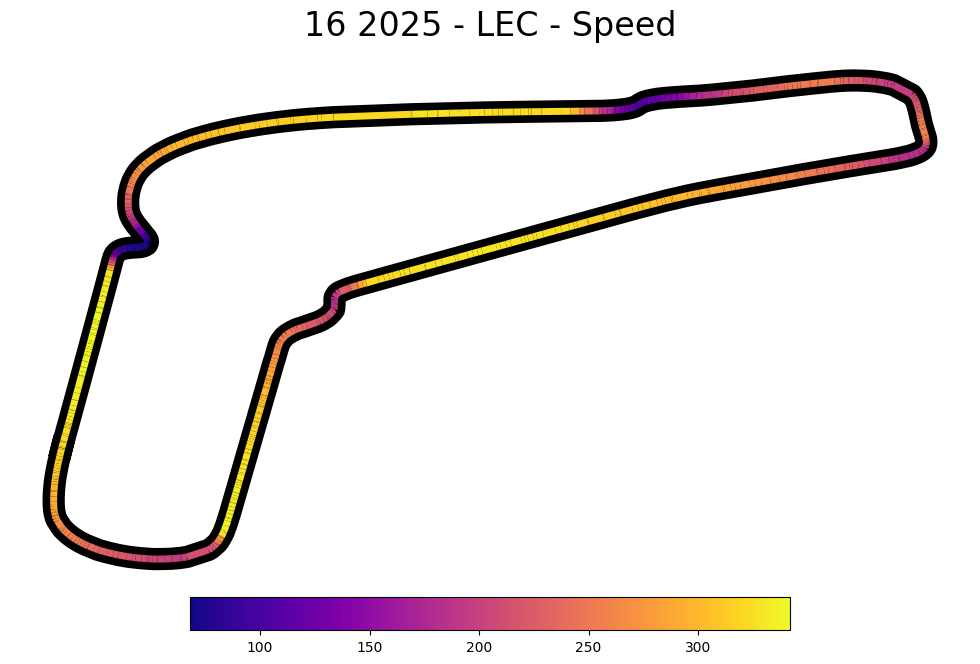

In [9]:
import matplotlib

fig, ax = plt.subplots(sharex=True,sharey=True,figsize=(12,6.75))
fig.suptitle(f"{weekend.name} 2025 - LEC - Speed",size=24,y=0.97)
plt.subplots_adjust(left=0.1,right=0.9,top=0.9,bottom=0.12)
ax.axis('off')

ax.plot(lap.telemetry['X'], lap.telemetry['Y'],color='black',linestyle='-',linewidth=16,zorder=0)
norm = plt.Normalize(color.min(),color.max())
lc = LineCollection(segments,cmap=matplotlib.cm.plasma,norm=norm,linestyle='-',linewidth=5)
lc.set_array(color)
line = ax.add_collection(lc)
cbaxes = fig.add_axes([0.25,0.05,0.5,0.05])
normlegend = matplotlib.colors.Normalize(vmin=color.min(),vmax=color.max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes,norm=normlegend,cmap=matplotlib.cm.plasma,orientation='horizontal')
plt.show()
